# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Sadewo Widyanto
- Email: dewo135789@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
- pertanyaan 2

## Menyaipkan semua library yang dibuthkan

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [510]:
customers_df = pd.read_csv('customers_dataset.csv',header=0)
geolocation_df = pd.read_csv('geolocation_dataset.csv', header=0)
order_items_df = pd.read_csv('order_items_dataset.csv', header=0)
order_payments_df = pd.read_csv('order_payments_dataset.csv',header=0)
order_reviews_df = pd.read_csv('order_reviews_dataset.csv',header=0)
orders_dataset_df = pd.read_csv('orders_dataset.csv', header=0)
product_category_name_translatiom_df = pd.read_csv ('product_category_name_translation.csv',header=0)
products_dataset_df = pd.read_csv('products_dataset.csv', header=0)
sellers_dataset_df = pd.read_csv('sellers_dataset.csv',header=0)

### Assessing Data

# Customers_id

In [511]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


# info dari table customer tidak ada menunjukan kenjanggalan,mulai dari jumlah data, dan tipe data.

In [512]:
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [513]:
#melohat duplikasi kolom
print ('duplikasi kolom', customers_df.duplicated().sum())

duplikasi kolom 0


In [514]:
#melihat missing_values
print ('missing_values', customers_df.isna().sum())

missing_values customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [515]:
#melihat jumlah kota berdasarkan unik
customers_df['customer_city'].nunique()

4119

In [516]:
#melihat jumlah berapa kali setiap kota muncul
customers_df['customer_city'].value_counts().reset_index().head(50)

,customer_city,count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


# Geolocation_dataset

In [517]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [518]:
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [519]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [520]:
print('duplikasi kolom',geolocation_df.duplicated().sum())

duplikasi kolom 261831


In [521]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [522]:
geolocation_df['geolocation_zip_code_prefix'].nunique()

19015

In [523]:
geolocation_df['geolocation_zip_code_prefix'].value_counts().reset_index()

,geolocation_zip_code_prefix,count
0,24220,1146
1,24230,1102
2,38400,965
3,35500,907
4,11680,879
...,...,...
19010,71750,1
19011,71742,1
19012,26475,1
19013,26357,1


In [524]:
geolocation_df['geolocation_city'].nunique()

8011

In [525]:
geolocation_df['geolocation_city'].value_counts().reset_index()

,geolocation_city,count
0,sao paulo,135800
1,rio de janeiro,62151
2,belo horizonte,27805
3,são paulo,24918
4,curitiba,16593
...,...,...
8006,jacuípe,1
8007,mar vermelho,1
8008,quebrangulo,1
8009,poço das trincheiras,1


### geolocation city dengan nama são paulo akan saya rubah menjadi 'sao paulo' karena nama ini hanya berbeda di tanda baca saja. mengingat di table customer_df hanya ada nama kota sao paulo saja.

In [526]:
#melihat jumlah data kategori state unik
geolocation_df['geolocation_state'].nunique()

27

In [527]:
# melihat jumlah berapa kali masing masing state muncul
#hal ini memastikan apakah ada nama yang sama jenis nya.
geolocation_df['geolocation_state'].value_counts().reset_index()

,geolocation_state,count
0,SP,404268
1,MG,126336
2,RJ,121169
3,RS,61851
4,PR,57859
5,SC,38328
6,BA,36045
7,GO,20139
8,ES,16748
9,PE,16432


# order_items_dataset

In [528]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [529]:
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Terlihat tipe data 'shipping_limit_date' bertipe object, maka akan saya ganti menjadi tipe data datetime, dan pada kolom 'price' dan 'freight_value' akan saya rubah menjadi tipe data integer untuk mempermudah dalam menganalisa

In [580]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.052668,19.510253
min,1.000000,2016-09-19 00:15:34,0.000000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.000000,13.000000
50%,1.000000,2018-01-26 13:59:35,74.000000,16.000000
75%,1.000000,2018-05-10 14:34:00.750000128,134.000000,21.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.000000
std,0.705124,NaN,183.699547,15.809998


In [581]:
#melihat duplikasi data pada table orders_item
order_items_df.duplicated().sum()

0

In [582]:
#melihat missing values pada table orders_item'
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

# order_payments

In [583]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [584]:
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [585]:
order_payments_df.duplicated().sum()

0

In [586]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [587]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [588]:
# tidak ada masalah dalam tabel order_payment terkait duplikat dan missing value
#terdapat nilai inacurete pada nilai min di kolom 'payment_installments' dan 'payment value'
#pada kategori 'voucher','credit_card','not_difined'

In [589]:
#melihat nilai in acurate pada kolom 'payment_installments'
order_payments_df[order_payments_df.payment_installments==order_payments_df.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [590]:
#melihat nilai in acurate pada kolom 'payment_installments'
order_payments_df[order_payments_df.payment_value==order_payments_df.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


# order_reviews_df

In [591]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [592]:
#adanya perbedaan jumlah data pada kolom 'review_comment_title' dan  'review_count_message'
#adanya kesalaan tipe data pada 2 kolom terakhir di table review_df

In [593]:
order_reviews_df.head(50)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [594]:
#melihat duplikasi kolom pada table order_reviews
order_reviews_df.duplicated().sum()

0

In [595]:
#melihat jumlah missing values pada table order_reviews
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [596]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [597]:
#cukup menjelaskan nilai angka review score.ini akan berpotensi mengisi miss value pada kolom comment_title

# orders_dataset_df

In [598]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [599]:
orders_dataset_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [600]:
#dapat dilihat. adanya kesalahan tipe data pada kolom yang sifatnya datetime.

In [601]:
#melihat duplikasi kolom pada table orders_dataset_df
orders_dataset_df.duplicated().sum()

0

In [602]:
#melihat missing values pada table orders_dataset_df
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [603]:
#terdapat 3 miss_values pada dataframe orders_dataset_df

In [604]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


# product_category_name_translatiom_df

In [605]:
product_category_name_translatiom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [606]:
product_category_name_translatiom_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# products_dataset_df

In [607]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [608]:
products_dataset_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [609]:
products_dataset_df.duplicated().sum()

0

In [610]:
#melihat missvalue pada data frame products_dataset_df
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

# sellers_dataset_df

In [611]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [612]:
sellers_dataset_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [613]:
sellers_dataset_df.duplicated().sum()

0

In [614]:
sellers_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [615]:
#tidak ada kendala dalam dataframe sellers_dataset_df

# Cleaning Data

## geolocation_df

### 1.menghapus duplikat value

In [616]:
geolocation_df.duplicated().sum()

7851

In [617]:
#menghapus duplikat value
geolocation_df.drop_duplicates(inplace=True)

#memastikan bahwa duplikat value telah dihapus
geolocation_df.duplicated().sum()

0

## 2.mengubah nama sao paulo

In [618]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo            91794
rio de janeiro       35177
belo horizonte       19474
curitiba             11263
porto alegre          8702
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
salgadinho               1
casserengue              1
Name: count, Length: 8010, dtype: int64

In [619]:
#merubah nama 'são paulo menjadi sao paulo
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].replace(['são paulo'],'sao paulo')

In [620]:
geolocation_df['geolocation_city'].value_counts()

geolocation_city
sao paulo            91794
rio de janeiro       35177
belo horizonte       19474
curitiba             11263
porto alegre          8702
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
salgadinho               1
casserengue              1
Name: count, Length: 8010, dtype: int64

## order_items

### 1. mengubah tipe data pada kolom 'shipping limit date'

In [621]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  int32         
 6   freight_value        112650 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 5.2+ MB


In [622]:
date = ['shipping_limit_date']

for column in date :
    order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  int32         
 6   freight_value        112650 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 5.2+ MB


In [623]:
#Merubah tipe data pada kolom price dan freight_value
order_items_df['price'] = order_items_df['price'].astype('int')
order_items_df['freight_value'] = order_items_df['freight_value'].astype('int')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  int32         
 6   freight_value        112650 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 5.2+ MB


## order_payments_df

### 1. Mengatasi invalid values

In [624]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Terlihat pada value min kolom (payment_installments) dan (payment_value). bisa diliat dibawah,kita akan mengisi dengan cara melihat value kolom (payment_installment) yang tertinggi atau dominan. 

### 1. payment_installment

In [625]:
order_payments_df[order_payments_df.payment_installments==order_payments_df.payment_installments.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [626]:
order_payments_df.groupby('payment_installments').order_id.nunique().sort_values(ascending=False).reset_index()

,payment_installments,order_id
0,1,49060
1,2,12389
2,3,10443
3,4,7088
4,10,5315
5,5,5234
6,8,4253
7,6,3916
8,7,1623
9,9,644


#### Nilai dominan terdapat pada nilai 1. maka untuk value 0, saya akan mengganti nilai 1

In [627]:
order_payments_df['payment_installments'] = order_payments_df['payment_installments'].replace([0], 1) #merubah value pada kolom
order_payments_df[order_payments_df.payment_installments==order_payments_df.payment_installments.min()] 
order_payments_df.describe()


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853368,154.100380
std,0.706584,2.687034,217.494064
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### 2.Mengatasi Payment_value

In [628]:
order_payments_df[order_payments_df.payment_value==order_payments_df.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [629]:
order_payments_df['payment_value'].mode()[0]

50.0

#### untuk mengisi 0 values kategori, kita akan menggunakan nilai palinf sering muncul pada kolom payment values.

In [630]:
order_payments_df['payment_value'].replace([0.0],50.0,inplace=True)
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853368,154.104712
std,0.706584,2.687034,217.491493
min,1.000000,1.000000,0.010000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### kini masalah invalid value pada dataframe order_payment sudah teratasi

### Review_orders

### dalam data frame review_orders, Terdapat masalah dalam miss values pada kolom
##### - Review_comment_tittle
##### - Review Comment Message

In [631]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [632]:
#melihat berapa jumlah missing value
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [633]:
#mempertimbangkan untuk mengatasi miss_value pada kolom review_comment_title 
order_reviews_df['review_comment_title'].value_counts().head()

review_comment_title
Recomendo          423
recomendo          345
Bom                293
super recomendo    270
Excelente          248
Name: count, dtype: int64

In [634]:
#mempertimbangkan untuk mengatasi miss_value pada kolom review_comment_title
order_reviews_df.groupby('review_comment_title').review_score.nunique().sort_values(ascending=False).reset_index().head(50)

,review_comment_title,review_score
0,recomendo,5
1,Entrega,5
2,RECOMENDO,5
3,Boa,5
4,5,5
5,Entrega,5
6,8,5
7,bom,5
8,Bom,5
9,Recomendo,5


In [635]:
##mempertimbangkan untuk mengatasi miss_value pada kolom review_comment_title dengan melihat angka score mana yang paling tinggi dan paling rendah
order_reviews_df['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [636]:
#mempertimbangkan untuk mengatasi miss_value pada kolom review_comment_title dengan melihat value review_score di bagian miss value pada kolom review_comment_title	

order_reviews_df[order_reviews_df.review_comment_title.isna()].head(50) 

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
10,c9cfd2d5ab5911836ababae136c3a10c,cdf9aa68e72324eeb25c7de974696ee2,5,NaN,NaN,2017-12-23 00:00:00,2017-12-26 14:36:03


#### Dapat disimpulkan, bahwa kolom 'review_comment' pada data frame cukup komplex. saya akan membuat ulang kategori sesuai kategori score dari kolom review_score. dan kedua, saya akan menghapus kolom review_comment_message. karena dengan review score dan review_comment_title sudah cukup untuk di analisa.

In [637]:
#menghapus kolom review_comment_message
order_reviews_df.drop(columns= 'review_comment_message', inplace=True)


In [638]:
bin_edges = [0,1,2,3,4,5]
category = ['very bad','bad','good','very good','best']
order_reviews_df['review_comment_title'] = pd.cut(order_reviews_df['review_score'],bins = bin_edges, labels=category, include_lowest=True)

In [639]:
order_reviews_df.head(20)

,review_id,order_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,very good,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,best,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,best,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,best,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,best,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,very bad,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,best,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,best,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,best,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,very good,2018-05-22 00:00:00,2018-05-23 16:45:47


In [640]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Merubah Tipe data review_creation_date dan review_answer_timestamp menjadi tipe data datetime.

In [641]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   review_id                99224 non-null  object  
 1   order_id                 99224 non-null  object  
 2   review_score             99224 non-null  int64   
 3   review_comment_title     99224 non-null  category
 4   review_creation_date     99224 non-null  object  
 5   review_answer_timestamp  99224 non-null  object  
dtypes: category(1), int64(1), object(4)
memory usage: 3.9+ MB


In [642]:
date_column = ['review_creation_date', 'review_answer_timestamp']

for column in date_column :
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  category      
 4   review_creation_date     99224 non-null  datetime64[ns]
 5   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


## orders_dataset_df

### 1. Mengubah tipe data date pada kolom
##### - order_delivered_carrier_date   
##### - order_delivered_customer_date
##### - order_estimated_delivery_date

In [643]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [644]:
date_column = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in date_column:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])
    orders_dataset_df[column] =  orders_dataset_df['order_approved_at'].dt.strftime("%Y-%m-%d")
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])
    orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dty

In [645]:
orders_dataset_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-02,2017-10-02,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26,2018-07-26,2018-07-26
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08,2018-08-08,2018-08-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18,2017-11-18,2017-11-18,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13,2018-02-13,2018-02-13,2018-02-13
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09,2017-03-09,2017-03-09,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06,2018-02-06,2018-02-06,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27,2017-08-27,2017-08-27,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08,2018-01-08,2018-01-08,2018-01-08


### 2.Mengatasi Miss value

In [646]:
orders_dataset_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date     160
order_delivered_customer_date    160
order_estimated_delivery_date    160
dtype: int64

#### saya akan menggunakan metode interpolate untuk mengatasi miss_value pada kolom tipe datetime          

In [647]:
column = ['order_delivered_carrier_date']

for column in column:
    orders_dataset_df[column].interpolate(method='linear', limit_direction='forward', inplace=True)

orders_dataset_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date       0
order_delivered_customer_date    160
order_estimated_delivery_date    160
dtype: int64

In [648]:
column = ['order_delivered_customer_date']

for column in column:
    orders_dataset_df[column].interpolate(method='linear', limit_direction='forward', inplace=True)

orders_dataset_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date    160
dtype: int64

In [649]:
column = ['order_approved_at']

for column in column:
    orders_dataset_df[column].interpolate(method='linear', limit_direction='forward', inplace=True)
    
print('jumlah duplikasi',orders_dataset_df.isna().sum())

jumlah duplikasi order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date    160
dtype: int64


## product_dataset_df

### Mengatasi missvalue

In [650]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [651]:
products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


#### saya akan mengisi missing_value pada kolom product_category_name dengan kategori produk tertinggi

In [652]:
#melihat produk kategori tertinggi
products_dataset_df['product_category_name'].value_counts(ascending=False).head(5)

product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: count, dtype: int64

In [653]:
products_dataset_df['product_category_name'].fillna(value='cama_mesa_banho',inplace=True)

In [654]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [655]:
products_dataset_df[(products_dataset_df['product_category_name']=='cama_mesa_banho')]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0
19,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,52.0,206.0,1.0,500.0,16.0,10.0,16.0
21,518ef5de2c2b3a255e326a4594ba15d9,cama_mesa_banho,27.0,329.0,2.0,800.0,36.0,8.0,16.0
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,45.0,206.0,1.0,650.0,16.0,10.0,16.0
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,56.0,509.0,4.0,6350.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...
32916,624a104988a613eba3eae6cd9132d397,cama_mesa_banho,49.0,330.0,1.0,450.0,59.0,13.0,38.0
32930,5bde14b0ba42a788655c3ebf4ba54597,cama_mesa_banho,44.0,1054.0,1.0,1500.0,31.0,21.0,26.0
32940,dfec64aac9b864b2807a7be33222b75f,cama_mesa_banho,58.0,252.0,4.0,850.0,38.0,7.0,28.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0


#### setelah miss_value pada kolom product_category_name terisi. saya akan mengisi misvalue pada 
#### - kolom product_name_lenght 
#### - product_description_lenght	
#### - product_photos_qty
#### dengan nilai yang paling sering muncul pada kategori cama_mesa_banho

#### 1. product_name_lenght

In [656]:
cama_mesa_banho = products_dataset_df[(products_dataset_df['product_category_name'].str.contains('cama_mesa_banho'))]
cama_mesa_banho['product_name_lenght'].mode()[0]

55.0

In [657]:
products_dataset_df['product_name_lenght'].fillna(value=55.0,inplace=True)
products_dataset_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### 2. product_description_lenght

In [658]:
cama_mesa_banho['product_description_lenght'].mode()[0]

729.0

In [659]:
products_dataset_df['product_description_lenght'].fillna(value=729.0,inplace=True)
products_dataset_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### 3.  product_photos_qty

In [660]:
cama_mesa_banho['product_photos_qty'].mode()[0]

1.0

In [661]:
products_dataset_df['product_photos_qty'].fillna(value=1.0,inplace=True)
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

#### saya akan akan miss_value pada 4 kolom terakhir. jika miss_value tersebut bersamaan dengan kolom miss_value sebelumnya, kita cukup menggunakan nilai modus pada kategori cama_mesa_banho

In [662]:
products_dataset_df[products_dataset_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,55.0,729.0,1.0,NaN,NaN,NaN,NaN


In [663]:
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

#### ternyata miss_value 4 kolom terakhir, dan ada kategori bebes. maka cukup dengan mengatasi nilai rata rata pada nilai kolom masing masing.

#### product_weight_g

In [664]:
products_dataset_df['product_weight_g'].mode()[0]

200.0

In [665]:
products_dataset_df['product_weight_g'].fillna(value='200.0',inplace=True)

#### product_length_cm

In [666]:
products_dataset_df['product_length_cm'].mode()[0]

16.0

In [667]:
products_dataset_df['product_length_cm'].fillna(value='16.0',inplace=True)

#### product_height_cm             

In [668]:
products_dataset_df['product_height_cm'].mode()[0]

10.0

In [669]:
products_dataset_df['product_height_cm'].fillna(value='10.0',inplace=True)

#### product_width_cm              

In [670]:
products_dataset_df['product_width_cm'].mode()[0]

11.0

In [671]:
products_dataset_df['product_width_cm'].fillna(value='11.0',inplace=True)
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

## Customer_df

In [672]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### melihat customer_city yang paling mendominasi

In [673]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [674]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

## geolocation_df

In [675]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [676]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,730481.000000,730481.000000,730481.000000
mean,38686.408510,-20.970693,-46.459132
std,30586.055973,5.917815,4.417205
min,1001.000000,-36.605374,-101.466766
25%,13053.000000,-23.602779,-48.913822
50%,29360.000000,-22.860066,-46.646554
75%,66093.000000,-19.913593,-43.790969
max,99990.000000,45.065933,121.105394


### Melihat demografi Geolocation_lat setiap masing masing geolocation_city

In [677]:
geolocation_df.groupby('geolocation_city').agg({
    'geolocation_zip_code_prefix' : 'nunique',
    'geolocation_lat' :['max','mean','min','std']
}).sort_values(by='geolocation_city',ascending=False).fillna(0)

geolocation_zip_code_prefix geolocation_lat              
                                       nunique             max       mean   
geolocation_city                                                            
óleo                                         1      -22.937454 -22.940222  \
óbidos                                       1       -1.897693  -1.907556   
érico cardoso                                1      -13.393047 -13.393047   
ângulo                                       1      -23.193593 -23.195501   
áurea                                        1      -27.692454 -27.695009   
...                                        ...             ...        ...   
abadia de goias                              1      -16.756821 -16.767161   
4º centenario                                1      -24.277697 -24.279801   
4o. centenario                               1      -24.271860 -24.271860   
...arraial do cabo                           1      -22.969370 -22.969370   
* cidade                                     1      -25.571748 -25.571748   

                                         
                          min       std  
geolocation_city                         
óleo               -22.944293  0.003242  
óbidos              -1.917688  0.005783  
érico cardoso      -13.393047  0.000000  
ângulo             -23.198309  0.002483  
áurea              -27.697565  0.003614  
...                       ...       ...  
abadia de goias    -16.789539  0.010773  
4º centenario      -24.281905  0.002976  
4o. centenario     -24.271860  0.000000  
...arraial do cabo -22.969370  0.000000  
* cidade           -25.571748  0.000000  

[8010 rows x 5 columns]

### Melihat demografi Geolocation_lat setiap masing masing geolocation_state

In [678]:
geolocation_df.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix' : 'nunique',
    'geolocation_lat' :['max','mean','min','std']
}).sort_values(by='geolocation_state',ascending=False).fillna(0)

geolocation_zip_code_prefix geolocation_lat              
                                      nunique             max       mean   
geolocation_state                                                          
TO                                        184       -5.256786  -9.491196  \
SP                                       6349       28.008978 -23.072983   
SE                                        135       -9.653517 -10.849796   
SC                                        620       -4.839351 -27.221521   
RS                                       1132       14.585073 -29.649720   
RR                                         28        4.482242   2.728836   
RO                                        108       -8.711423 -10.358394   
RN                                        280       -4.835705  -5.851196   
RJ                                       1390       43.684961 -22.708461   
PR                                       1046       42.184003 -24.761659   
PI                                        307       -2.849024  -5.700164   
PE                                        596       -3.542424  -8.188160   
PB                                        324       41.385328  -7.084286   
PA                                        309       42.428884  -2.668023   
MT                                        254       38.816816 -14.214147   
MS                                        242      -17.563804 -20.790811   
MG                                       1868       25.995245 -19.857420   
MA                                        313       -1.197891  -3.821203   
GO                                        773      -12.993015 -16.567440   
ES                                        315       29.409252 -20.078083   
DF                                        516      -11.000345 -15.814327   
CE                                        548       -2.793588  -4.395199   
BA                                        992       38.991963 -13.062407   
AP                                         26        3.849093   0.073767   
AM                                        144        0.537738  -3.346562   
AL                                        178       45.065933  -9.592373   
AC                                         46       -7.591290  -9.709319   

                                        
                         min       std  
geolocation_state                       
TO                -13.052784  1.938800  
SP                -29.683911  0.906757  
SE                -11.525233  0.281775  
SC                -29.326515  0.708595  
RS                -36.605374  1.065738  
RR                  0.794582  0.468143  
RO                -22.854742  1.412809  
RN                -23.515978  0.451520  
RJ                -34.586422  0.604911  
PR                -26.499679  1.084966  
PI                -10.748199  1.676943  
PE                -26.562523  0.505840  
PB                 -8.082587  0.748044  
PA                -20.905149  2.280565  
MT                -29.926701  2.136931  
MS                -23.983882  1.260697  
MG                -30.048103  1.449614  
MA                 -9.479397  1.497804  
GO                -21.467829  1.134598  
ES                -21.823092  0.888664  
DF                -16.047095  0.134652  
CE                -22.551255  1.214806  
BA                -34.622400  1.721587  
AP                -26.405093  1.573824  
AM                 -9.166197  1.073800  
AL                -29.800343  1.051149  
AC                -23.578707  1.167721

### Melihat Demografi geolocation_lng beradasarkan masing masing geolocation_city

In [679]:
geolocation_df.groupby(by='geolocation_city').agg({
    'geolocation_zip_code_prefix' : 'nunique',
    'geolocation_lng' : ['max','mean','min','std']
}).sort_values(by='geolocation_city',ascending=False).fillna(0)

geolocation_zip_code_prefix geolocation_lng              
                                       nunique             max       mean   
geolocation_city                                                            
óleo                                         1      -49.336995 -49.339676  \
óbidos                                       1      -55.510995 -55.516181   
érico cardoso                                1      -42.134282 -42.134282   
ângulo                                       1      -51.916100 -51.917007   
áurea                                        1      -52.054195 -52.055076   
...                                        ...             ...        ...   
abadia de goias                              1      -49.426674 -49.438178   
4º centenario                                1      -53.074516 -53.074723   
4o. centenario                               1      -53.069433 -53.069433   
...arraial do cabo                           1      -42.029834 -42.029834   
* cidade                                     1      -49.334374 -49.334374   

                                         
                          min       std  
geolocation_city                         
óleo               -49.343426  0.002987  
óbidos             -55.524011  0.003770  
érico cardoso      -42.134282  0.000000  
ângulo             -51.918154  0.001048  
áurea              -52.055957  0.001246  
...                       ...       ...  
abadia de goias    -49.469430  0.014300  
4º centenario      -53.074930  0.000293  
4o. centenario     -53.069433  0.000000  
...arraial do cabo -42.029834  0.000000  
* cidade           -49.334374  0.000000  

[8010 rows x 5 columns]

### Melihat Demografi geolocation_lng beradasarkan masing masing geolocation_state

In [680]:
geolocation_df.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix' : 'nunique',
    'geolocation_lng' : ['min','mean','max','std']
}).sort_values(by='geolocation_state',ascending=False)

geolocation_zip_code_prefix geolocation_lng              
                                      nunique             min       mean   
geolocation_state                                                          
TO                                        184      -49.959205 -48.357650  \
SP                                       6349      -61.932123 -47.176422   
SE                                        135      -38.184450 -37.200155   
SC                                        620      -53.741598 -49.635839   
RS                                       1132      -64.287433 -52.064923   
RR                                         28      -61.572981 -60.678320   
RO                                        108      -66.621318 -62.707688   
RN                                        280      -46.582170 -36.010145   
RJ                                       1390      -63.907933 -43.150314   
PR                                       1046      -54.596507 -50.950723   
PI                                        307      -45.923649 -42.486986   
PE                                        596      -56.154587 -35.786982   
PB                                        324      -38.716670 -35.858154   
PA                                        309      -57.765111 -49.529152   
MT                                        254      -61.462058 -55.715380   
MS                                        242      -57.890969 -54.535157   
MG                                       1868      -98.078544 -44.449445   
MA                                        313      -48.435954 -44.818273   
GO                                        773      -56.171869 -49.344447   
ES                                        315     -101.466766 -40.516053   
DF                                        516      -68.752185 -47.979684   
CE                                        548      -56.053477 -39.028335   
BA                                        992      -58.901888 -39.627164   
AP                                         26      -53.045751 -51.204454   
AM                                        144      -72.585795 -60.535697   
AL                                        178      -51.870929 -36.067588   
AC                                         46      -72.930746 -68.453261   

                                         
                          max       std  
geolocation_state                        
TO                 -46.403401  0.584169  
SP                 -15.536867  1.232228  
SE                 -36.466537  0.276319  
SC                 -35.014650  1.391439  
RS                 121.105394  1.599931  
RR                 -59.413734  0.219825  
RO                 -46.314026  1.312765  
RN                 -35.003729  1.040173  
RJ                  13.820214  0.707472  
PR                  -8.723762  1.742746  
PI                 -40.608565  0.823446  
PE                 -32.402779  1.541346  
PB                  -8.717342  1.248460  
PA                  -6.873344  2.478401  
MT                  -9.394625  1.932391  
MS                 -51.088155  1.309622  
MG                 -34.850352  1.774738  
MA                 -41.897421  1.271865  
GO                 -46.106244  1.160489  
ES                 -35.340424  0.871803  
DF                 -46.428287  0.452475  
CE                 -34.835134  0.817880  
BA                  -4.947823  1.713727  
AP                 -50.791373  0.366935  
AM                 -56.714206  2.161256  
AL                   9.341528  1.028490  
AC                 -43.352613  2.126546

### Berapa jumlah masing masing status order???

In [681]:
orders_dataset_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### Status 'Delivered' yang paling tinggi, kini saya akan eksplor dengan menggabungkan dataframe customers_df dan orders_dataset_df untuk melihat jumlah setiap status order untuk masing masing kota customer dan negara customer

In [682]:
#join table
bycustomer_join = pd.merge(
left =customers_df,
right = orders_dataset_df,
how = 'left',
left_on ='customer_id',
right_on ='customer_id'
)

bycustomer_join.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-16,2017-05-16,2017-05-16
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12,2018-01-12,2018-01-12,2018-01-12
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20,2018-05-20,2018-05-20,2018-05-20
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13,2018-03-13,2018-03-13,2018-03-13
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29,2018-07-29,2018-07-29,2018-07-29


In [683]:
bycustomer_join.groupby('order_status').agg({
    'customer_city' : 'nunique',
    'customer_state' : 'nunique'
}).sort_values(by='customer_city',ascending=False)

,customer_city,customer_state
order_status,,
delivered,4085,27
shipped,341,25
unavailable,290,24
canceled,247,23
processing,174,22
invoiced,166,21
created,5,5
approved,2,2


### Kita bisa melihat total berapa jumlah customer_city dan customer_state setiap masing masing order_status. Delivered berada di peringkat pertama, dan kota mana yang memiiki status delivered paling tinggi? dan berapa total nya??

In [684]:
bycustomer_join.groupby(by='customer_city').order_status.value_counts().sort_values(ascending=False).reset_index()

,customer_city,order_status,count
0,sao paulo,delivered,15045
1,rio de janeiro,delivered,6601
2,belo horizonte,delivered,2697
3,brasilia,delivered,2071
4,curitiba,delivered,1489
...,...,...,...
5305,macuco de minas,delivered,1
5306,carazinho,unavailable,1
5307,presidente dutra,canceled,1
5308,madalena,delivered,1


### Bisa kita lihat, bahwa kota sao paulo yang memiliki status delivered paling tinggi

### Sekarang,Saya menggabungkan dataframe order_items_df dan products_dataset_df, untuk menganalisa produk apa yang paling tinggi penjualan nya. Namun tak lupa dengan adanya dataframe product_category_name_translatiom_df, dataframe ini berfungsi agar para audiens mengerti. karena tidak semua audiens paham dengan bahasan brasil

In [685]:
byorder_items = pd.merge(
left = order_items_df,
right = products_dataset_df,
how = 'left',
left_on = 'product_id',
right_on = 'product_id'
)

In [686]:
#join table product_category_name_translatiom_df
byorder_english = pd.merge(
left = product_category_name_translatiom_df,
right = byorder_items,
how = 'right',
left_on = 'product_category_name',
right_on = 'product_category_name'
)
byorder_english

,product_category_name,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,cool_stuff,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58,13,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,pet_shop,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239,19,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,moveis_decoracao,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,17,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,perfumaria,perfumery,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12,12,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,ferramentas_jardim,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199,18,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,utilidades_domesticas,housewares,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299,43,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,informatica_acessorios,computers_accessories,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350,36,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,esporte_lazer,sports_leisure,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99,16,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,informatica_acessorios,computers_accessories,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55,8,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [687]:
byorder_english.groupby(by=['product_category_name','product_category_name_english']).agg({
    'product_id' : 'nunique',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='price',ascending=False)

,,product_id,price,freight_value
product_category_name,product_category_name_english,,,
beleza_saude,health_beauty,2444,1252690,177848
cama_mesa_banho,bed_bath_table,3639,1207819,226556
relogios_presentes,watches_gifts,1329,1203007,97629
esporte_lazer,sports_leisure,2867,983274,164489
informatica_acessorios,computers_accessories,1639,907286,143633
...,...,...,...,...
flores,flowers,14,1088,476
casa_conforto_2,home_comfort_2,5,733,396
cds_dvds_musicais,cds_dvds_musicals,1,730,218


### Produk health_beauty berada di peringkat atas. dan produk security_and_services berada di peringkat akhir. selanjutnya, produk ini laris di daerah kota dan negara mana saja? mari kita telusuri dengan meggabung kan dua dataframe yang sudah gabung dari beberapa dataframe. saya analisa berdasarkan order_id

In [688]:
#Join 
join_order_product = pd.merge(
left = byorder_english,
right = bycustomer_join,
how = 'left',
left_on = 'order_id',
right_on = 'order_id')

join_order_product

,product_category_name,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,cool_stuff,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58,13,58.0,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13,2017-09-13,2017-09-13,2017-09-13
1,pet_shop,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239,19,56.0,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26,2017-04-26,2017-04-26,2017-04-26
2,moveis_decoracao,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,17,59.0,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14,2018-01-14,2018-01-14,2018-01-14
3,perfumaria,perfumery,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12,12,42.0,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08,2018-08-08,2018-08-08,2018-08-08
4,ferramentas_jardim,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199,18,59.0,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04,2017-02-04,2017-02-04,2017-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,utilidades_domesticas,housewares,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299,43,43.0,...,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25,2018-04-25,2018-04-25,2018-04-25
112646,informatica_acessorios,computers_accessories,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350,36,31.0,...,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-17,2018-07-17,2018-07-17,2018-07-17
112647,esporte_lazer,sports_leisure,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99,16,43.0,...,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-24,2017-10-24,2017-10-24,2017-10-24
112648,informatica_acessorios,computers_accessories,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55,8,56.0,...,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-15,2017-08-15,2017-08-15,2017-08-15


In [689]:
join_order_product.groupby(by=['customer_city','product_category_name_english']).agg({
    'order_id' : 'nunique',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='price',ascending=False)

order_id   price   
customer_city    product_category_name_english                       
sao paulo        bed_bath_table                       1909  197904  \
                 health_beauty                        1533  188312   
                 watches_gifts                         778  165641   
                 computers_accessories                1004  143903   
                 sports_leisure                       1266  143757   
...                                                    ...     ...   
tupa             construction_tools_construction         1       3   
extrema          music                                   1       3   
palmeira d'oeste computers_accessories                   1       3   
caldas novas     fashion_underwear_beach                 1       3   
hortolandia      construction_tools_construction         1       0   

                                                  freight_value  
customer_city    product_category_name_english                   
sao paulo        bed_bath_table                           31359  
                 health_beauty                            21869  
                 watches_gifts                             9262  
                 computers_accessories                    16000  
                 sports_leisure                           19253  
...                                                         ...  
tupa             construction_tools_construction             12  
extrema          music                                        7  
palmeira d'oeste computers_accessories                       11  
caldas novas     fashion_underwear_beach                     15  
hortolandia      construction_tools_construction             18  

[25328 rows x 3 columns]

### Dari informasi diatas, bahwa sao paulo	berada di peringkat atas. yang cukup mengejutkan adalah health beauty berada di peringkat kedua di kota sao paulo, mari kita coba cari tau berdasarkan customer_state

In [690]:
join_order_product.groupby(by=['customer_state','product_category_name_english']).agg({
    'order_id' : 'nunique',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='price',ascending=False)

order_id   price  freight_value
customer_state product_category_name_english                                 
SP             bed_bath_table                     5001  541419          83429
               health_beauty                      3789  459740          55098
               watches_gifts                      2135  434283          26476
               sports_leisure                     3296  384343          52840
               computers_accessories              2679  348835          44495
...                                                ...     ...            ...
AL             drinks                                1      15             34
PR             home_comfort_2                        1      12             15
ES             home_comfort_2                        1      12             15
BA             home_comfort_2                        1      12             16
MS             costruction_tools_tools               1       6             19

[1356 rows x 3 columns]

### state SP berada di peringkat pertama dengan informasi yang sama, dimana health_beauty di peringkat kedua, sekarang kita akan melihat, tipe pembayaran apa yang dimiliki setiap kota dan negara

In [691]:
join_all = pd.merge(
left = join_order_product,
right = order_payments_df,
how = 'left',
left_on = 'order_id',
right_on = 'order_id'
)

join_all

,product_category_name,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,cool_stuff,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58,13,58.0,...,delivered,2017-09-13 08:59:02,2017-09-13,2017-09-13,2017-09-13,2017-09-13,1.0,credit_card,2.0,72.19
1,pet_shop,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239,19,56.0,...,delivered,2017-04-26 10:53:06,2017-04-26,2017-04-26,2017-04-26,2017-04-26,1.0,credit_card,3.0,259.83
2,moveis_decoracao,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,17,59.0,...,delivered,2018-01-14 14:33:31,2018-01-14,2018-01-14,2018-01-14,2018-01-14,1.0,credit_card,5.0,216.87
3,perfumaria,perfumery,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12,12,42.0,...,delivered,2018-08-08 10:00:35,2018-08-08,2018-08-08,2018-08-08,2018-08-08,1.0,credit_card,2.0,25.78
4,ferramentas_jardim,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199,18,59.0,...,delivered,2017-02-04 13:57:51,2017-02-04,2017-02-04,2017-02-04,2017-02-04,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,utilidades_domesticas,housewares,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299,43,43.0,...,delivered,2018-04-23 13:57:06,2018-04-25,2018-04-25,2018-04-25,2018-04-25,1.0,boleto,1.0,343.40
117600,informatica_acessorios,computers_accessories,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350,36,31.0,...,delivered,2018-07-14 10:26:46,2018-07-17,2018-07-17,2018-07-17,2018-07-17,1.0,boleto,1.0,386.53
117601,esporte_lazer,sports_leisure,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99,16,43.0,...,delivered,2017-10-23 17:07:56,2017-10-24,2017-10-24,2017-10-24,2017-10-24,1.0,credit_card,3.0,116.85
117602,informatica_acessorios,computers_accessories,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55,8,56.0,...,delivered,2017-08-14 23:02:59,2017-08-15,2017-08-15,2017-08-15,2017-08-15,1.0,credit_card,3.0,64.71


In [692]:
join_all.groupby(by=['payment_type','customer_city']).agg({
    'order_id' : 'nunique',
    'payment_value' : 'sum',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='payment_value',ascending=False)

order_id  payment_value    price   
payment_type customer_city                                               
credit_card  sao paulo                   12098     2204311.37  1559710  \
             rio de janeiro               5473     1243223.47   818888   
boleto       sao paulo                    2754      539136.94   304257   
credit_card  belo horizonte               2214      404248.52   294555   
             brasilia                     1680      349509.01   256973   
...                                        ...            ...      ...   
voucher      caratinga                       1           1.78       44   
             iguape                          1           1.65      129   
             santo anastacio                 1           1.29       29   
             antonio pereira                 1           0.92       39   
credit_card  sao sebastiao de campos         1           0.19       23   

                                      freight_value  
payment_type customer_city                           
credit_card  sao paulo                       193705  
             rio de janeiro                  126533  
boleto       sao paulo                        45093  
credit_card  belo horizonte                   48440  
             brasilia                         39981  
...                                             ...  
voucher      caratinga                           10  
             iguape                              27  
             santo anastacio                     11  
             antonio pereira                     18  
credit_card  sao sebastiao de campos             15  

[7465 rows x 4 columns]

## Berdasarkan Payment_type, bahwa kota sao paulo juga memiliki tipe pembayaran credit_card paling banyak. dan kategori produk apa yang paling laris?

In [693]:
join_all.groupby(by=['payment_type','product_category_name_english']).agg({
    'order_id' : 'nunique',
    'payment_value' : 'sum',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='payment_value',ascending=False)

order_id  payment_value   
payment_type product_category_name_english                                    
credit_card  bed_bath_table                             8654     1570752.19  \
             health_beauty                              6874     1326716.99   
             watches_gifts                              4568     1169481.98   
             sports_leisure                             5904     1088571.54   
             furniture_decor                            4919     1077975.12   
...                                                      ...            ...   
debit_card   costruction_tools_garden                      1          53.30   
voucher      cine_photo                                    2          44.12   
             home_comfort_2                                2          37.90   
debit_card   small_appliances_home_oven_and_coffee         1          35.65   
voucher      christmas_supplies                            2          35.50   

                                                      price  freight_value  
payment_type product_category_name_english                                  
credit_card  bed_bath_table                          989033         182460  
             health_beauty                          1024137         140456  
             watches_gifts                          1037919          80123  
             sports_leisure                          786695         127836  
             furniture_decor                         570717         129920  
...                                                     ...            ...  
debit_card   costruction_tools_garden                    35             18  
voucher      cine_photo                                  26             19  
             home_comfort_2                              24             21  
debit_card   small_appliances_home_oven_and_coffee       27              7  
voucher      christmas_supplies                          25             22  

[263 rows x 4 columns]

In [694]:
join_all

,product_category_name,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,cool_stuff,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58,13,58.0,...,delivered,2017-09-13 08:59:02,2017-09-13,2017-09-13,2017-09-13,2017-09-13,1.0,credit_card,2.0,72.19
1,pet_shop,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239,19,56.0,...,delivered,2017-04-26 10:53:06,2017-04-26,2017-04-26,2017-04-26,2017-04-26,1.0,credit_card,3.0,259.83
2,moveis_decoracao,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,17,59.0,...,delivered,2018-01-14 14:33:31,2018-01-14,2018-01-14,2018-01-14,2018-01-14,1.0,credit_card,5.0,216.87
3,perfumaria,perfumery,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12,12,42.0,...,delivered,2018-08-08 10:00:35,2018-08-08,2018-08-08,2018-08-08,2018-08-08,1.0,credit_card,2.0,25.78
4,ferramentas_jardim,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199,18,59.0,...,delivered,2017-02-04 13:57:51,2017-02-04,2017-02-04,2017-02-04,2017-02-04,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,utilidades_domesticas,housewares,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299,43,43.0,...,delivered,2018-04-23 13:57:06,2018-04-25,2018-04-25,2018-04-25,2018-04-25,1.0,boleto,1.0,343.40
117600,informatica_acessorios,computers_accessories,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350,36,31.0,...,delivered,2018-07-14 10:26:46,2018-07-17,2018-07-17,2018-07-17,2018-07-17,1.0,boleto,1.0,386.53
117601,esporte_lazer,sports_leisure,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99,16,43.0,...,delivered,2017-10-23 17:07:56,2017-10-24,2017-10-24,2017-10-24,2017-10-24,1.0,credit_card,3.0,116.85
117602,informatica_acessorios,computers_accessories,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55,8,56.0,...,delivered,2017-08-14 23:02:59,2017-08-15,2017-08-15,2017-08-15,2017-08-15,1.0,credit_card,3.0,64.71


### Berdasarkan kategori produk, bahwa bed_bath_table berada di peringkat atas. Sekarang, mari kita analisa penjualan dari seller_dataset_df.

In [695]:
join_all = pd.merge(
left = join_all,
right = sellers_dataset_df,
how = 'left',
left_on = 'seller_id',
right_on = 'seller_id')
join_all

,product_category_name,product_category_name_english,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,cool_stuff,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58,13,58.0,...,2017-09-13,2017-09-13,2017-09-13,1.0,credit_card,2.0,72.19,27277,volta redonda,SP
1,pet_shop,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239,19,56.0,...,2017-04-26,2017-04-26,2017-04-26,1.0,credit_card,3.0,259.83,3471,sao paulo,SP
2,moveis_decoracao,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199,17,59.0,...,2018-01-14,2018-01-14,2018-01-14,1.0,credit_card,5.0,216.87,37564,borda da mata,MG
3,perfumaria,perfumery,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12,12,42.0,...,2018-08-08,2018-08-08,2018-08-08,1.0,credit_card,2.0,25.78,14403,franca,SP
4,ferramentas_jardim,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199,18,59.0,...,2017-02-04,2017-02-04,2017-02-04,1.0,credit_card,3.0,218.04,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,utilidades_domesticas,housewares,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299,43,43.0,...,2018-04-25,2018-04-25,2018-04-25,1.0,boleto,1.0,343.40,88303,itajai,SC
117600,informatica_acessorios,computers_accessories,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350,36,31.0,...,2018-07-17,2018-07-17,2018-07-17,1.0,boleto,1.0,386.53,1206,sao paulo,SP
117601,esporte_lazer,sports_leisure,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99,16,43.0,...,2017-10-24,2017-10-24,2017-10-24,1.0,credit_card,3.0,116.85,80610,curitiba,PR
117602,informatica_acessorios,computers_accessories,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55,8,56.0,...,2017-08-15,2017-08-15,2017-08-15,1.0,credit_card,3.0,64.71,4733,sao paulo,SP


In [696]:
join_all.groupby(by='product_category_name_english').seller_id.nunique().sort_values(ascending=False).reset_index()

,product_category_name_english,seller_id
0,health_beauty,492
1,sports_leisure,481
2,housewares,468
3,bed_bath_table,431
4,auto,383
...,...,...
66,home_comfort_2,4
67,flowers,3
68,security_and_services,2
69,la_cuisine,2


### ternyata,seller banyak menjual produk health_beauty,mari kita lihat, berdasarkan jumlah tersebut, kota apa yang paling banyak kontribusi dalam menjual produk?

In [697]:
join_all.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).reset_index()

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
...,...,...
606,ivoti,1
607,itirapina,1
608,itau de minas,1
609,itapui,1


In [698]:
join_all.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False).reset_index()

,seller_state,seller_id
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


### Ternyata kota Sao paulo dan negara berkode SP paling banyak berkontribusi dalam menjual produk. Kira kira apakah memang health_beauty adalah penjualan paling laris di kota sao paulo dan SP??

In [699]:
join_all.groupby(by=['seller_city','product_category_name_english']).agg({
    'seller_id' : 'nunique',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='price',ascending=False)

seller_id   price   
seller_city           product_category_name_english                        
ibitinga              bed_bath_table                          41  534953  \
sao paulo             cool_stuff                              65  297058   
                      furniture_decor                         82  268272   
                      health_beauty                          119  255792   
guariba               watches_gifts                            1  208077   
...                                                          ...     ...   
santa rosa de viterbo auto                                     1       8   
fazenda rio grande    bed_bath_table                           1       7   
fernando prestes      bed_bath_table                           1       6   
araraquara            construction_tools_construction          1       3   
ibia                  construction_tools_construction          1       0   

                                                       freight_value  
seller_city           product_category_name_english                   
ibitinga              bed_bath_table                          113599  
sao paulo             cool_stuff                               39112  
                      furniture_decor                          57448  
                      health_beauty                            37145  
guariba               watches_gifts                            17412  
...                                                              ...  
santa rosa de viterbo auto                                        16  
fazenda rio grande    bed_bath_table                              18  
fernando prestes      bed_bath_table                              12  
araraquara            construction_tools_construction             12  
ibia                  construction_tools_construction             58  

[3264 rows x 3 columns]

### Ternyata meskipun sao paulo merupakan kontribusi paling tinggi secara jumlah penjualan, tetapi secara price, kota ibitinga yang memilki jumlah price tertinggi, mungkin secara jenis produk, kota ibtinga menjual produk dengan harga yang mahal. bagaimana jika berdasarkan state

In [700]:
join_all.groupby(by=['seller_state','seller_city','product_category_name_english']).agg({
    'seller_id' : 'nunique',
    'price' : 'sum',
    'freight_value' : 'sum'
}).sort_values(by='price',ascending=False)

seller_id   
seller_state seller_city           product_category_name_english                
SP           ibitinga              bed_bath_table                          41  \
             sao paulo             cool_stuff                              65   
                                   furniture_decor                         82   
                                   health_beauty                          119   
             guariba               watches_gifts                            1   
...                                                                       ...   
             santa rosa de viterbo auto                                     1   
PR           fazenda rio grande    bed_bath_table                           1   
SP           fernando prestes      bed_bath_table                           1   
             araraquara            construction_tools_construction          1   
MG           ibia                  construction_tools_construction          1   

                                                                     price   
seller_state seller_city           product_category_name_english             
SP           ibitinga              bed_bath_table                   534953  \
             sao paulo             cool_stuff                       297058   
                                   furniture_decor                  268272   
                                   health_beauty                    255792   
             guariba               watches_gifts                    208077   
...                                                                    ...   
             santa rosa de viterbo auto                                  8   
PR           fazenda rio grande    bed_bath_table                        7   
SP           fernando prestes      bed_bath_table                        6   
             araraquara            construction_tools_construction       3   
MG           ibia                  construction_tools_construction       0   

                                                                    freight_value  
seller_state seller_city           product_category_name_english                   
SP           ibitinga              bed_bath_table                          113599  
             sao paulo             cool_stuff                               39112  
                                   furniture_decor                          57448  
                                   health_beauty                            37145  
             guariba               watches_gifts                            17412  
...                                                                           ...  
             santa rosa de viterbo auto                                        16  
PR           fazenda rio grande    bed_bath_table                              18  
SP           fernando prestes      bed_bath_table                              12  
             araraquara            construction_tools_construction             12  
MG           ibia                  construction_tools_construction             58  

[3293 rows x 3 columns]

### seller_state berkode 'SP' merupakan kontribusi paling tinggi, itbinga dan sao paulo termasuk didalam nya. kini saya mulai penasaran, bagaimana review para customer?

In [701]:
join_all = pd.merge(
left=join_all,
right=order_reviews_df,
how ='left',
left_on ='order_id',
right_on = 'order_id')

In [702]:
join_all['review_comment_title'].value_counts()

review_comment_title
best         66264
very good    22286
very bad     14857
good          9840
bad           4085
Name: count, dtype: int64

### Kategori Best mendapatkan peringkat pertama , mari kita telusuri, produk apa yang paling menjadi favorit.

In [703]:
join_all.groupby(by=['review_comment_title','product_category_name_english']).agg({
    'review_id': 'nunique',
}).sort_values(by='review_id',ascending=False).head(50)

review_id
review_comment_title product_category_name_english           
best                 bed_bath_table                      5748
                     health_beauty                       5390
                     sports_leisure                      4638
                     computers_accessories               3698
                     furniture_decor                     3586
                     housewares                          3464
                     watches_gifts                       3201
                     toys                                2390
                     auto                                2210
                     telephony                           2209
                     cool_stuff                          2146
very good            bed_bath_table                      2140
best                 garden_tools                        2062
                     perfumery                           2018
                     baby                                1636
very good            health_beauty                       1586
                     sports_leisure                      1467
best                 stationery                          1432
                     electronics                         1424
very bad             bed_bath_table                      1413
very good            computers_accessories               1341
                     furniture_decor                     1190
                     housewares                          1119
best                 fashion_bags_accessories            1107
                     pet_shop                            1073
very good            watches_gifts                       1053
good                 bed_bath_table                      1029
very good            telephony                            901
very bad             health_beauty                        896
                     computers_accessories                837
                     furniture_decor                      819
very good            auto                                 806
very bad             sports_leisure                       802
very good            cool_stuff                           720
                     garden_tools                         691
                     toys                                 684
good                 health_beauty                        679
best                 luggage_accessories                  671
very bad             watches_gifts                        655
best                 consoles_games                       596
very bad             housewares                           590
good                 furniture_decor                      563
                     sports_leisure                       557
very good            electronics                          553
good                 computers_accessories                541
very good            baby                                 523
                     perfumery                            504
best                 office_furniture                     502
good                 housewares                           500
very bad             telephony                            485

In [704]:
join_all.isna().sum()

product_category_name              0
product_category_name_english     25
order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date     15
p

### setelah semua kolom di gabung. dapat terlihat adanya miss value karena jumlah rows tiap dataframe berbeda beda. maka dari itu saya memilih untuk menghapus miss_value pada dataframe tersebut. karena miss_value pada dataframe tersebut bukan menjadi prioritas analisis saya.

In [705]:
join_all.dropna(inplace=True)
join_all.isna().sum()

product_category_name            0
product_category_name_english    0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type        

In [706]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117289 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_name          117289 non-null  object        
 1   product_category_name_english  117289 non-null  object        
 2   order_id                       117289 non-null  object        
 3   order_item_id                  117289 non-null  int64         
 4   product_id                     117289 non-null  object        
 5   seller_id                      117289 non-null  object        
 6   shipping_limit_date            117289 non-null  datetime64[ns]
 7   price                          117289 non-null  int32         
 8   freight_value                  117289 non-null  int32         
 9   product_name_lenght            117289 non-null  float64       
 10  product_description_lenght     117289 non-null  float64       
 11  produ

In [714]:
## Merubah tipe data review_score menjadi integer
join_all['review_score'] = join_all['review_score'].astype('int')
join_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117289 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_category_name          117289 non-null  object        
 1   product_category_name_english  117289 non-null  object        
 2   order_id                       117289 non-null  object        
 3   order_item_id                  117289 non-null  int64         
 4   product_id                     117289 non-null  object        
 5   seller_id                      117289 non-null  object        
 6   shipping_limit_date            117289 non-null  datetime64[ns]
 7   price                          117289 non-null  int32         
 8   freight_value                  117289 non-null  int32         
 9   product_name_lenght            117289 non-null  float64       
 10  product_description_lenght     117289 non-null  float64       
 11  produ

### bed_bath_table merupakan Produk Favorit

## Visualization & Explanatory Analysis

### Untuk sesi ini saya akan menganalisa dan memvisualisasikan data. beberapa pertanyaan yaitu :
##### 1. Bagaimana Performa revenue pemesanan beberapa bulan terakhir?
##### 2. produk apa yang paling best seller?
##### 3. Kota mana yang memiliki kontribusi paling tinggi dan yang paling rendah?
##### 4. Kapan terakhir pelanggan dari setiap 5 kota melakukan transaksi?
##### 5. Seberapa sering setiap 5 kota melakukan pembelian dalam beberapa bulan terakhir?
##### 6. Berapa banyak uang yang dihabiskan setiap 5 kota dalam beberapa bulan terakhir?

## 1. Bagaimana Performa revenue pemesanan beberapa bulan terakhir?
##### seperti yang diajarkan, saya akan sampling data time series.

In [715]:
#saya akan sampling

monthly_orders_df = join_all.resample(rule='M', on='order_approved_at').agg({
    'order_id' : 'nunique',
    'price' : 'sum' 
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    'order_id' : 'order_count',
    'price' : 'Revenue'
},inplace=True)

monthly_orders_df

,order_approved_at,order_count,Revenue
0,2016-10,305,50120
1,2016-11,0,0
2,2016-12,1,10
3,2017-01,744,122775
4,2017-02,1706,257968
5,2017-03,2629,386177
6,2017-04,2346,385341
7,2017-05,3626,542329
8,2017-06,3202,455293
9,2017-07,3888,523204


Text(0, 0.5, 'Total Revenue')

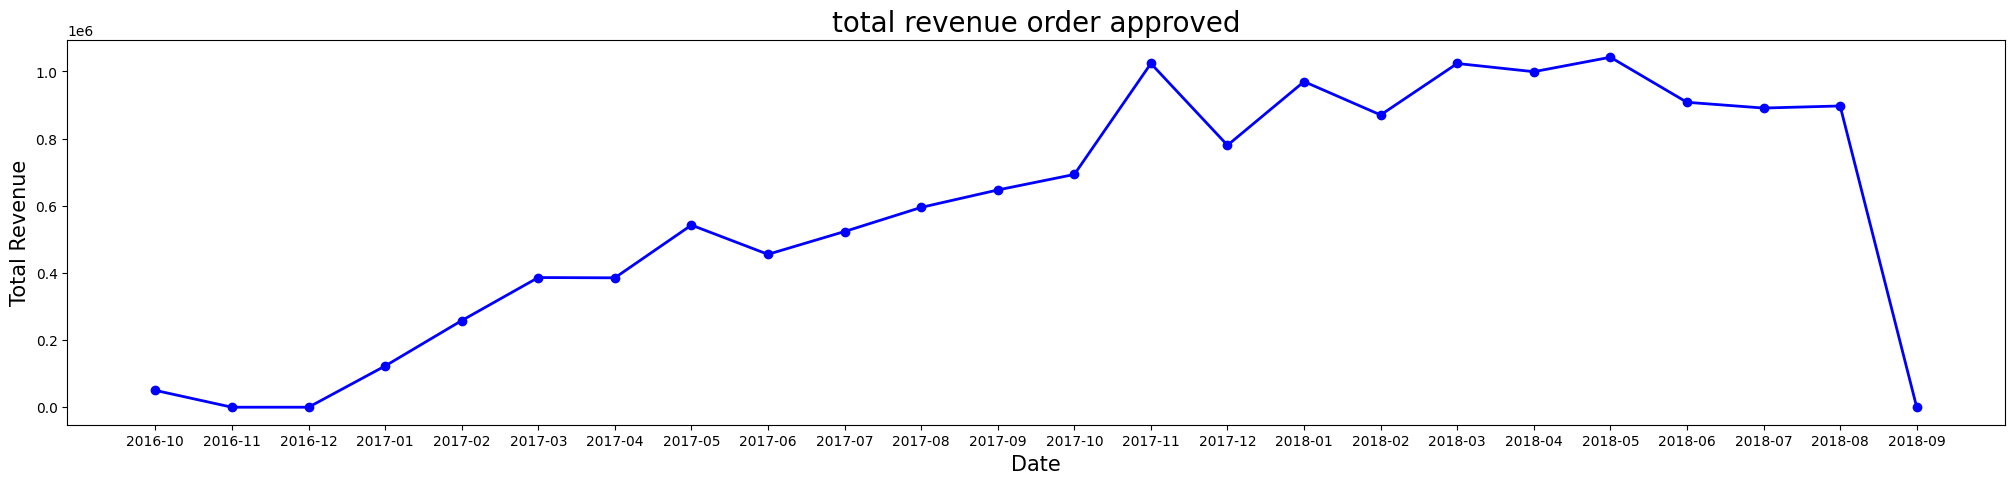

In [716]:
plt.figure(figsize=(25,5))
plt.plot(monthly_orders_df['order_approved_at'],monthly_orders_df['Revenue'], marker='o', linewidth=2, color='blue')
plt.title('total revenue order approved',loc='center',fontsize=20)
plt.xlabel ('Date',fontsize=15)
plt.ylabel ('Total Revenue', fontsize=15)

Text(0.5, 0, 'Date')

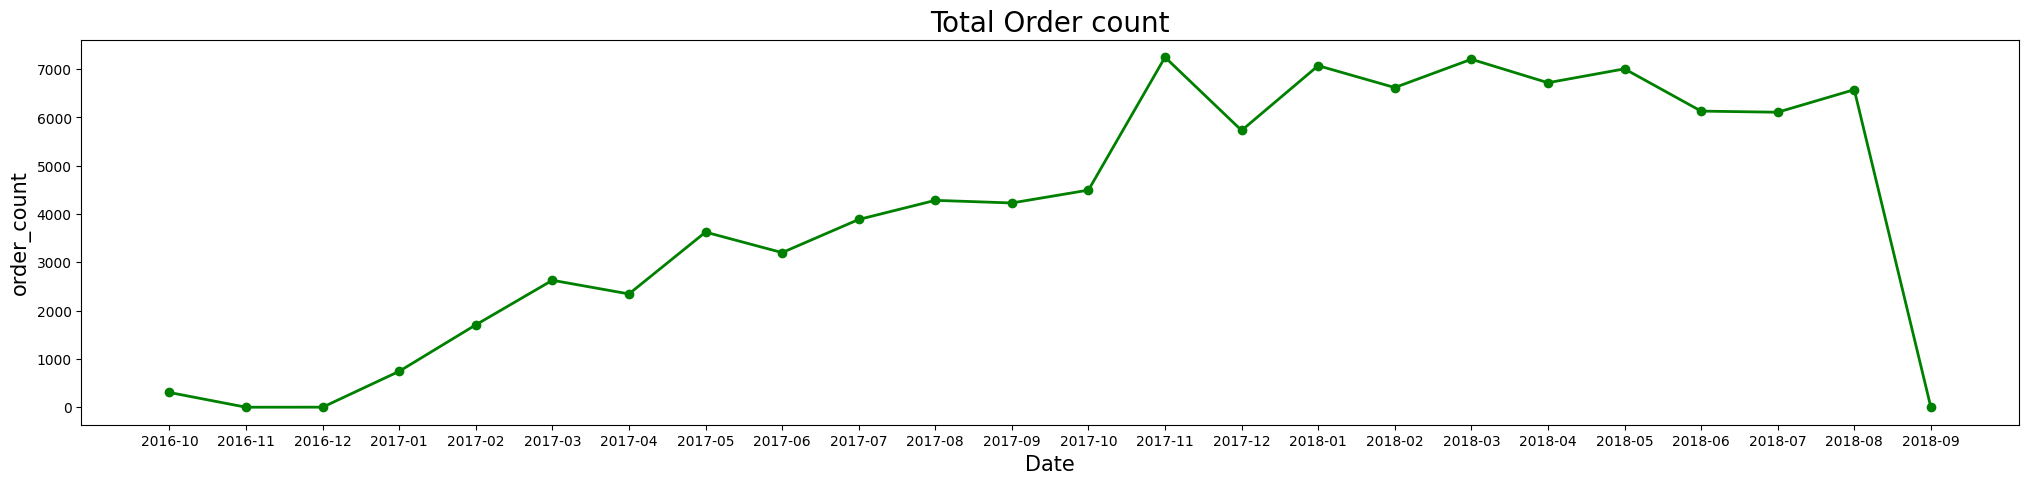

In [717]:
plt.figure(figsize=(25,5))
plt.plot(monthly_orders_df['order_approved_at'],monthly_orders_df['order_count'],marker='o',linewidth=2,color='Green')
plt.title('Total Order count',loc='center',fontsize=20)
plt.ylabel('order_count',fontsize=15)
plt.xlabel('Date',fontsize=15)

#### Bisa kita lihat informasi diatas, perkembangan revenue dari pemesanan yang disetujui cukup berkembang dengan baik. namun, pada bulan 9, terjadi penurunan yang sangat drastis.

## 2. Produk apa yang paling best seller??
#### saya akan membuatnya dengan visualisasi data histogram

In [718]:
color = ['#00688B','#97FFFF','#97FFFF','#97FFFF','#97FFFF','#97FFFF']

category_product = join_all.groupby('product_category_name_english').agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id',ascending=False).reset_index()

category_product.rename(columns={
    'order_id' : 'order_count',
    'price' : 'Total_price'
},inplace=True)

category_product.head(5)

,product_category_name_english,order_count,Total_price
0,bed_bath_table,10743,1276903
1,health_beauty,8770,1284726
2,sports_leisure,7667,1017481
3,computers_accessories,6649,940144
4,furniture_decor,6395,759998


### berdasarkan jumlah order

Text(0.5, 1.0, '5 produk tertinggi')

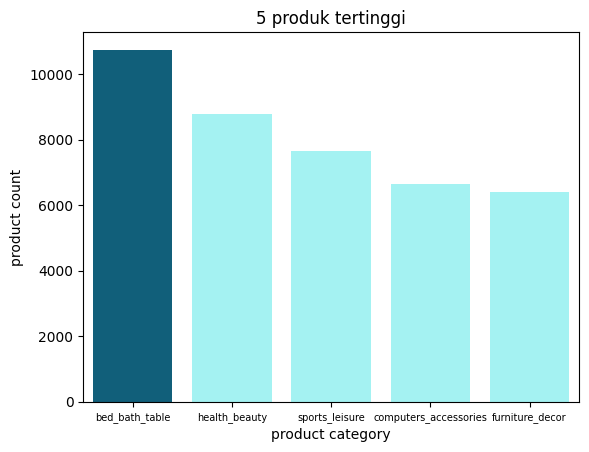

In [719]:
sns.barplot(x='product_category_name_english',y='order_count',data=category_product.sort_values(by='order_count',ascending=False).head(5),palette=color)
plt.tick_params(axis='x',labelsize=7)
plt.ylabel('product count')
plt.xlabel('product category')
plt.title('5 produk tertinggi')

### Kategori bed_bath_table berada di posisi pertama. mari kita validasi melalui total_price, apakah produk tsb berada di posisi yang sama??

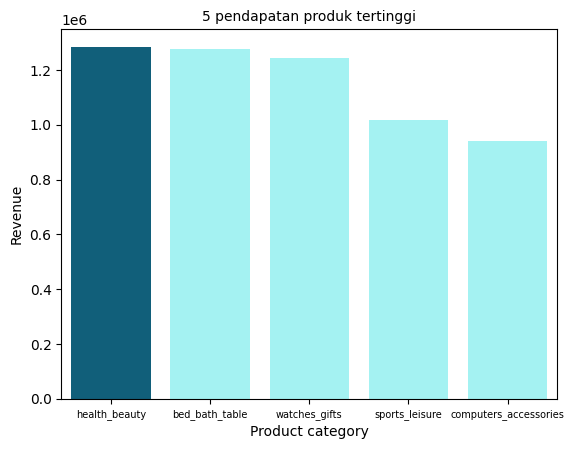

In [720]:
sns.barplot(x='product_category_name_english',y='Total_price',data=category_product.sort_values(by='Total_price',ascending=False).head(5),palette=color)
plt.tick_params(axis='x',labelsize=7)
plt.xlabel ('Product category')
plt.ylabel('Revenue')
plt.title('5 pendapatan produk tertinggi',loc='center',fontsize=10)
plt.show()

### secara price, produk health_beauty berada di posisi pertama, meskipun perbedaan nya sangat tipis sekali

 ## 3. Kota mana yang memiliki kontribusi paling tinggi dan yang paling rendah?

In [721]:
city_state_category = join_all.groupby(by=['customer_city']).agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id',ascending=False).reset_index()

city_state_category.rename(columns={
    'order_id' : 'order_count',
    'price' : 'Revenue'
},inplace=True)

city_state_category.head(5)

,customer_city,order_count,Revenue
0,sao paulo,15288,1997886
1,rio de janeiro,6747,1013378
2,belo horizonte,2730,361149
3,brasilia,2106,311765
4,curitiba,1501,217314


Text(0.5, 0, 'Order Count')

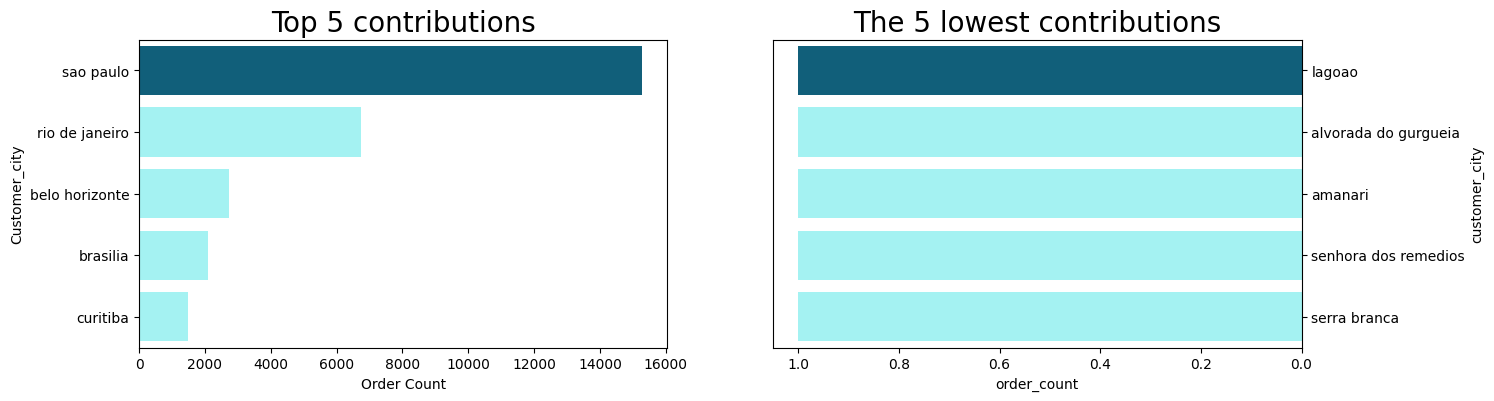

In [722]:
fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

color = ['#00688B','#97FFFF','#97FFFF','#97FFFF','#97FFFF','#97FFFF']

sns.barplot(x='order_count',y='customer_city',data=city_state_category.sort_values(by='order_count',ascending=False).head(5),palette=color,ax=ax[0])
ax[0].set_title ('Top 5 contributions',loc='center',fontsize=20)
ax[0].set_ylabel ('Customer_city')
ax[0].set_xlabel ('Order Count')

sns.barplot(x='order_count',y='customer_city',data=city_state_category.sort_values(by='order_count',ascending=True).head(5),palette=color,ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].invert_xaxis()
ax[1].set_title ('The 5 lowest contributions',loc='center',fontsize=20)
ax[1].set_ylabel ('Customer_city')
ax[1].set_xlabel ('Order Count')

### Sao paulo berada kontribusi paling tinggi, sementara Nova rendencao berada kontribusi paling rendah, bagaimana jika berdasarkan price?? mari kita lihat

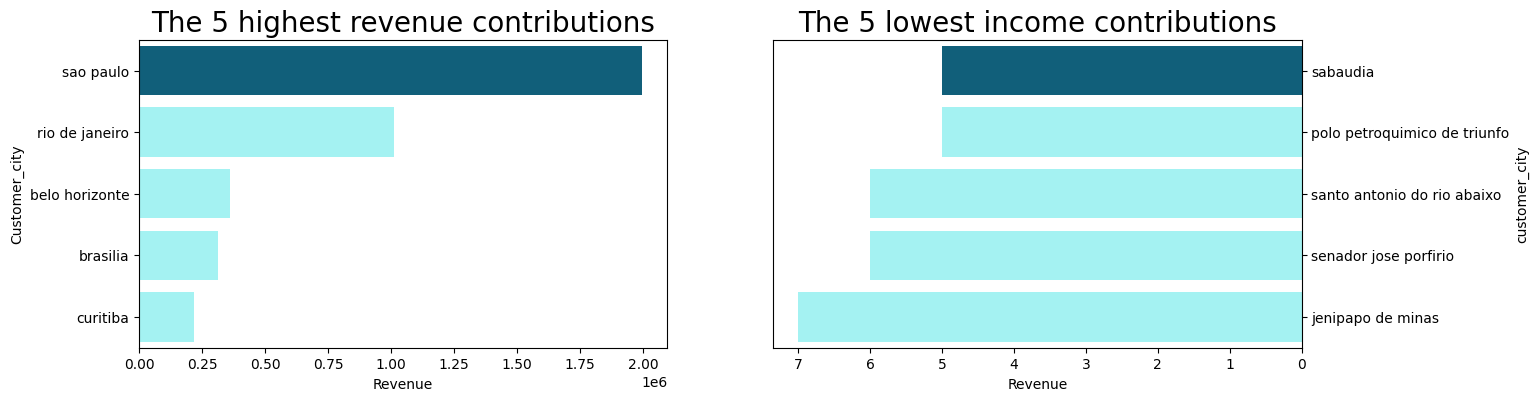

In [723]:
fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.barplot(x='Revenue',y='customer_city',data=city_state_category.sort_values(by='Revenue',ascending=False).head(5),palette=color,ax=ax[0])
ax[0].set_title ('The 5 highest revenue contributions',loc='center',fontsize=20)
ax[0].set_ylabel ('Customer_city')
ax[0].set_xlabel ('Revenue')

sns.barplot(x='Revenue',y='customer_city',data=city_state_category.sort_values(by='Revenue',ascending=True).head(5),palette=color,ax=ax[1])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].invert_xaxis()
ax[1].set_title ('The 5 lowest income contributions',loc='center',fontsize=20)
ax[0].set_ylabel ('Customer_city')
ax[0].set_xlabel ('Revenue')

plt.show()

### Rfm Analysis, seperti yang sudah dijelaskan dalam materi, hal ini beguna untuk melihat seberapa besar kontribusi setiap kota

In [724]:
rfm_analysis = join_all.groupby('customer_city').agg({
    'order_approved_at' : 'max',
    'order_id' : 'nunique',
    'price' : 'sum'
}).reset_index()

rfm_analysis.columns = ['customer_city', 'max_order_timestamp', 'frequency', 'monetary']

rfm_analysis['max_order_timestamp'] = rfm_analysis['max_order_timestamp'].dt.date
recent_date = orders_dataset_df['order_approved_at'].dt.date.max()
rfm_analysis["recency"] = rfm_analysis['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
 
rfm_analysis.drop('max_order_timestamp', axis=1, inplace=True)
rfm_analysis.head()

,customer_city,frequency,monetary,recency
0,abadia dos dourados,3,358,60
1,abadiania,1,949,218
2,abaete,11,1592,14
3,abaetetuba,11,4047,31
4,abaiara,2,262,115


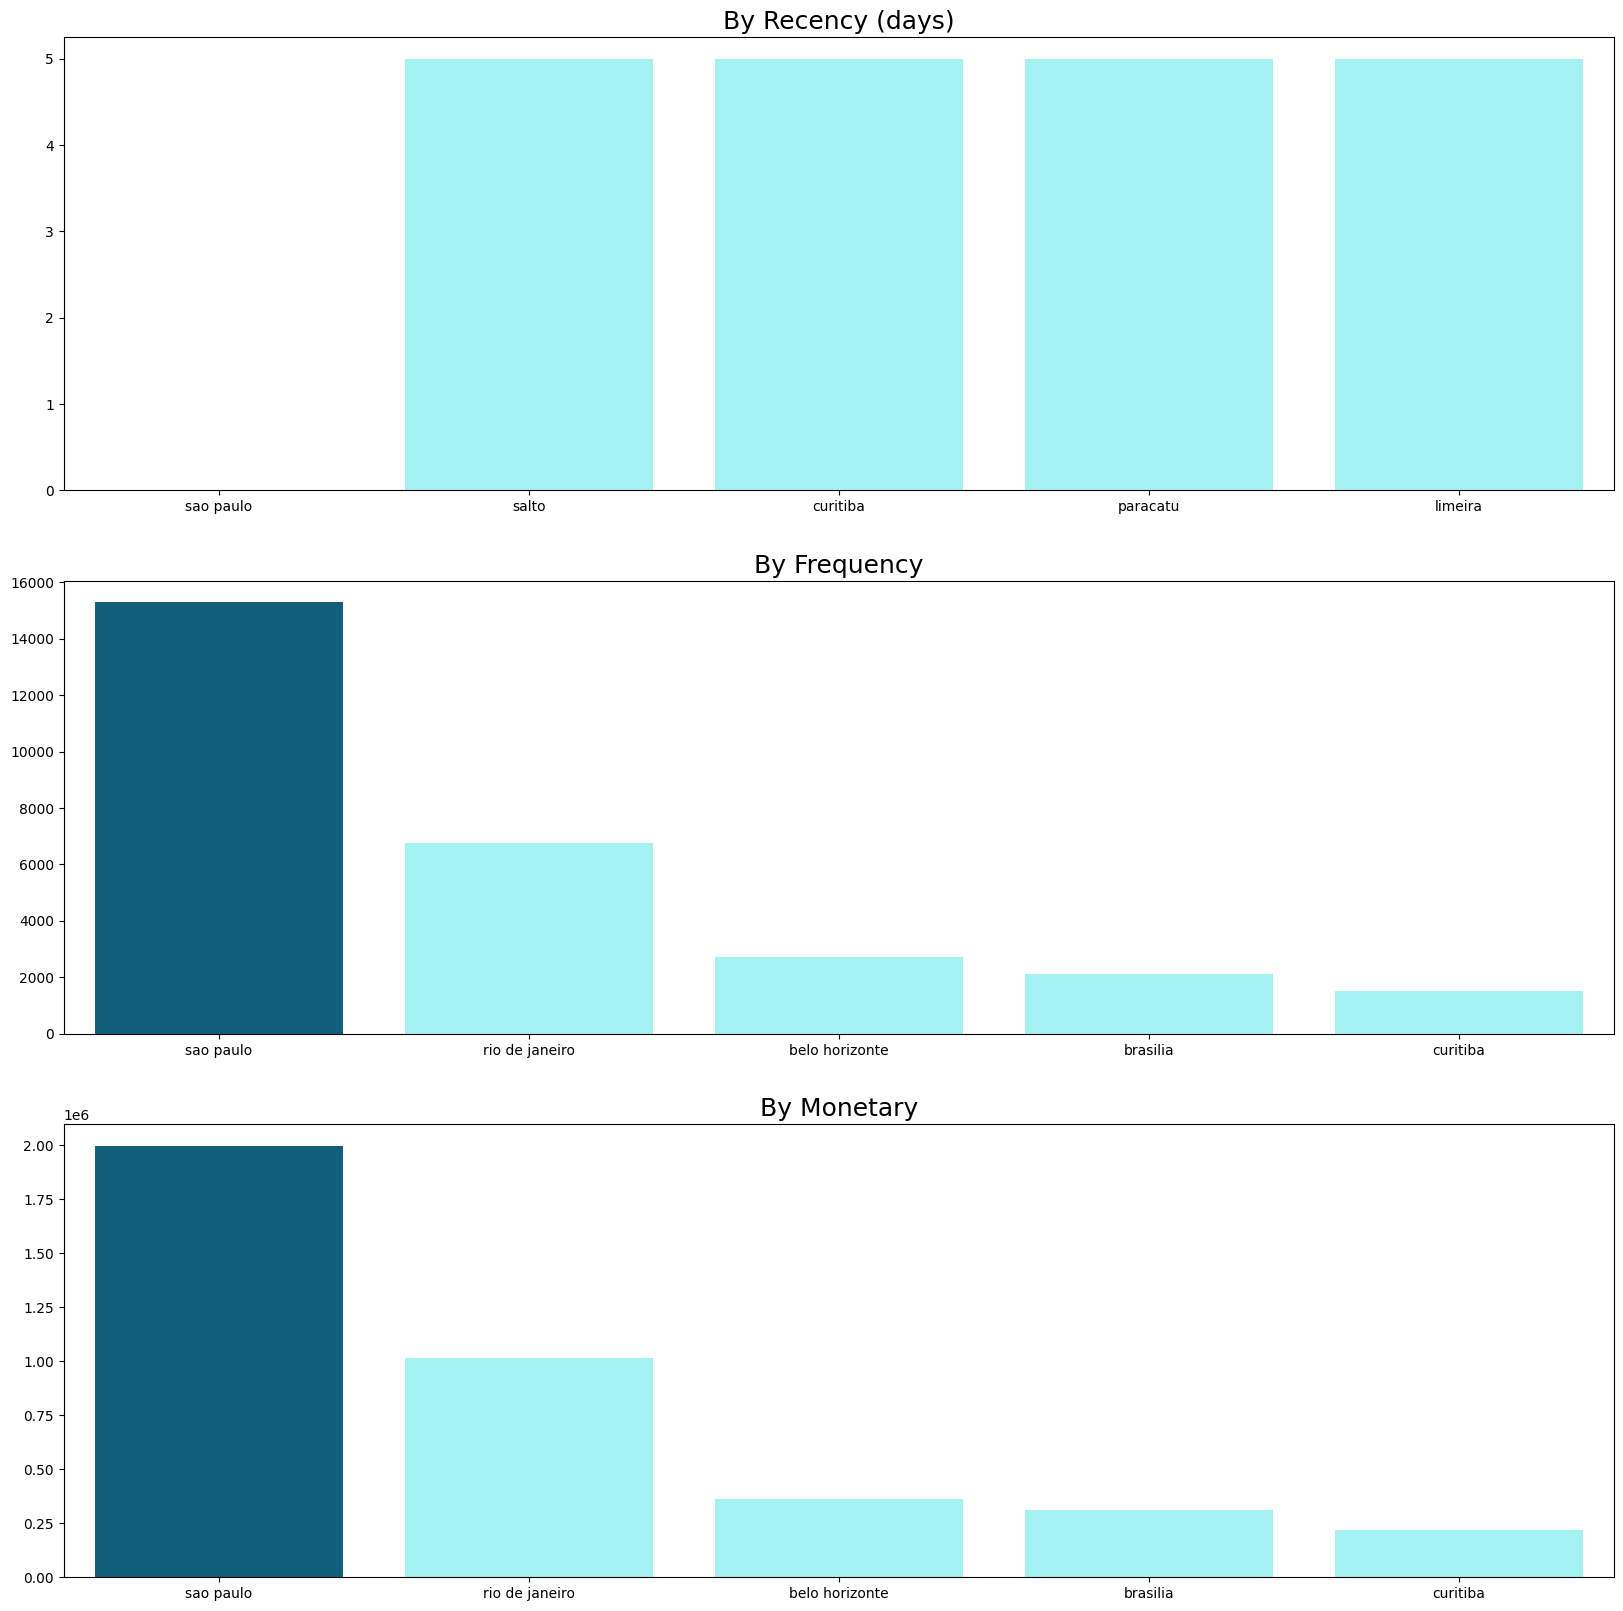

In [725]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

color = ['#00688B','#97FFFF','#97FFFF','#97FFFF','#97FFFF','#97FFFF']

sns.barplot(x='customer_city',y='recency',data=rfm_analysis.sort_values(by='recency',ascending=True).head(5),palette=color,ax=ax[0])
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis ='x', labelsize=10)

sns.barplot(y="frequency", x="customer_city", data=rfm_analysis.sort_values(by="frequency", ascending=False).head(5), palette=color, ax=ax[1])
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=10)

sns.barplot(y="monetary", x="customer_city", data=rfm_analysis.sort_values(by="monetary", ascending=False).head(5), palette=color, ax=ax[2])
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].tick_params(axis='x', labelsize=10)


## kesimpulan diatas bahwa sao paulo dinyatakan kota yang paling loyal menurut dataset yang saya analisa, RFM analysis ini sudah bisa menjawab 3 pertanyaan terakhir.

# Selanjutnya, Saya akan melanjutkan pada tahap sesi pengembangan dashboard melalui menggunakan streamlit.


# Terima Kasih :)

In [727]:
join_all.to_csv("join_all.csv", index=False)